In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchinfo 

from trainer import Trainer 
from tester import Tester
from utils import  visualize_data,show_misclassified_images,plot_class_distribution,plot_confusion_matrix,plot_curves
from dataloader import Cifar10DataLoader
from vistransformers import train_transforms,test_transforms
from model import Net,Network

In [2]:
torch.cuda.amp.autocast(enabled=True,dtype=torch.float16)
torch.set_float32_matmul_precision('medium')

/tmp/ipykernel_214261/727418639.py:1: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  torch.cuda.amp.autocast(enabled=True,dtype=torch.float16)


In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Is CUDA available? ", use_cuda)

Is CUDA available?  True


In [4]:
cifar10 = Cifar10DataLoader(is_cuda_available=use_cuda)

train_loader = cifar10.get_loader(transforms=train_transforms,train=True)
test_loader  = cifar10.get_loader(transforms=test_transforms,train=False) 

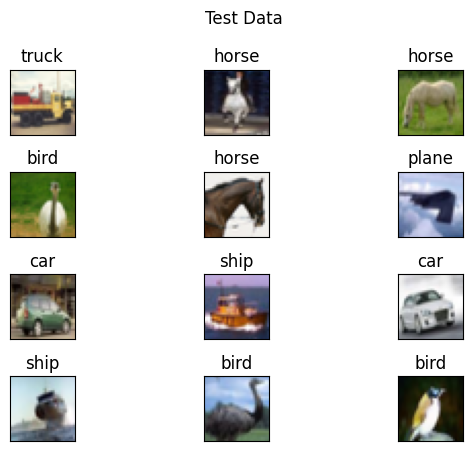

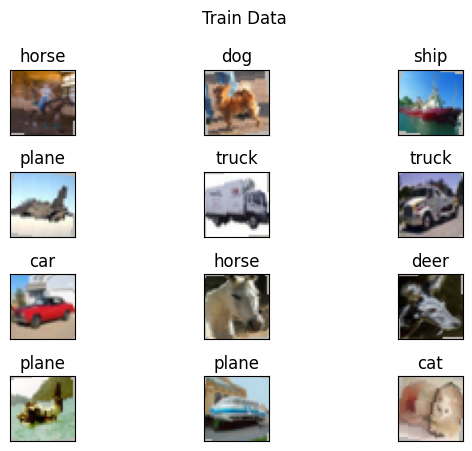

In [5]:
visualize_data(test_loader,12,"Test Data",classes=cifar10.classes)
visualize_data(train_loader,12,"Train Data",classes=cifar10.classes)

In [6]:
model = Network('group')
torchinfo.summary(model=model.cuda(),input_data=torch.ones((1,3,32,32)),device="cuda")

Layer (type:depth-idx)                   Output Shape              Param #
Network                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 16, 32, 32]           432
│    └─ReLU: 2-2                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-3                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-4                    [1, 16, 32, 32]           --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           2,304
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-7                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
│    └─Conv2d: 2-9                       [1, 10, 32, 32]           160
├─MaxPool2d: 1-2                         [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 16, 16, 16]           --
│    └─Con

EPOCH=1| LR=0.200000| LOSS=1.70| BATCH=390| ACCURACY=29.820: 100%|██████████| 391/391 [00:09<00:00, 39.21it/s]
LOSS=133.30| BATCH=78| ACCURACY=38.430: 100%|██████████| 79/79 [00:00<00:00, 103.23it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=2| LR=0.200000| LOSS=1.62| BATCH=390| ACCURACY=41.082: 100%|██████████| 391/391 [00:10<00:00, 38.91it/s]
LOSS=117.09| BATCH=78| ACCURACY=46.350: 100%|██████████| 79/79 [00:00<00:00, 105.23it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=3| LR=0.200000| LOSS=1.38| BATCH=390| ACCURACY=46.440: 100%|██████████| 391/391 [00:10<00:00, 38.77it/s]
LOSS=108.22| BATCH=78| ACCURACY=49.460: 100%|██████████| 79/79 [00:00<00:00, 103.54it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=4| LR=0.200000| LOSS=1.15| BATCH=390| ACCURACY=51.704: 100%|██████████| 391/391 [00:10<00:00, 38.62it/s]
LOSS=101.43| BATCH=78| ACCURACY=53.810: 100%|██████████| 79/79 [00:00<00:00, 104.90it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=5| LR=0.200000| LOSS=1.14| BATCH=390| ACCURACY=55.844: 100%|██████████| 391/391 [00:10<00:00, 38.11it/s]
LOSS=90.51| BATCH=78| ACCURACY=58.600: 100%|██████████| 79/79 [00:00<00:00, 102.97it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=6| LR=0.200000| LOSS=1.28| BATCH=390| ACCURACY=58.880: 100%|██████████| 391/391 [00:10<00:00, 37.86it/s]
LOSS=88.31| BATCH=78| ACCURACY=59.740: 100%|██████████| 79/79 [00:00<00:00, 102.55it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=7| LR=0.200000| LOSS=0.82| BATCH=390| ACCURACY=61.282: 100%|██████████| 391/391 [00:10<00:00, 38.14it/s]
LOSS=75.31| BATCH=78| ACCURACY=66.140: 100%|██████████| 79/79 [00:00<00:00, 103.66it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=8| LR=0.200000| LOSS=0.94| BATCH=390| ACCURACY=63.690: 100%|██████████| 391/391 [00:10<00:00, 37.83it/s]
LOSS=74.64| BATCH=78| ACCURACY=67.030: 100%|██████████| 79/79 [00:00<00:00, 102.34it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=9| LR=0.200000| LOSS=0.88| BATCH=390| ACCURACY=65.696: 100%|██████████| 391/391 [00:10<00:00, 37.72it/s]
LOSS=75.58| BATCH=78| ACCURACY=66.290: 100%|██████████| 79/79 [00:00<00:00, 102.69it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=10| LR=0.200000| LOSS=0.93| BATCH=390| ACCURACY=67.606: 100%|██████████| 391/391 [00:10<00:00, 37.40it/s]
LOSS=66.85| BATCH=78| ACCURACY=70.320: 100%|██████████| 79/79 [00:00<00:00, 100.20it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=11| LR=0.200000| LOSS=0.88| BATCH=390| ACCURACY=68.224: 100%|██████████| 391/391 [00:10<00:00, 37.15it/s]
LOSS=63.59| BATCH=78| ACCURACY=71.490: 100%|██████████| 79/79 [00:00<00:00, 99.46it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=12| LR=0.200000| LOSS=0.86| BATCH=390| ACCURACY=69.674: 100%|██████████| 391/391 [00:10<00:00, 37.30it/s]
LOSS=64.72| BATCH=78| ACCURACY=71.170: 100%|██████████| 79/79 [00:00<00:00, 100.85it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=13| LR=0.200000| LOSS=0.75| BATCH=390| ACCURACY=70.656: 100%|██████████| 391/391 [00:10<00:00, 37.12it/s]
LOSS=60.52| BATCH=78| ACCURACY=73.290: 100%|██████████| 79/79 [00:00<00:00, 101.88it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=14| LR=0.200000| LOSS=0.82| BATCH=390| ACCURACY=71.384: 100%|██████████| 391/391 [00:10<00:00, 36.68it/s]
LOSS=65.61| BATCH=78| ACCURACY=70.840: 100%|██████████| 79/79 [00:00<00:00, 93.46it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=15| LR=0.200000| LOSS=0.81| BATCH=390| ACCURACY=72.292: 100%|██████████| 391/391 [00:11<00:00, 34.87it/s]
LOSS=61.03| BATCH=78| ACCURACY=73.400: 100%|██████████| 79/79 [00:00<00:00, 91.19it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=16| LR=0.200000| LOSS=0.90| BATCH=390| ACCURACY=72.612: 100%|██████████| 391/391 [00:11<00:00, 34.75it/s]
LOSS=63.26| BATCH=78| ACCURACY=72.400: 100%|██████████| 79/79 [00:00<00:00, 91.59it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=17| LR=0.200000| LOSS=0.86| BATCH=390| ACCURACY=72.890: 100%|██████████| 391/391 [00:11<00:00, 34.19it/s]
LOSS=57.76| BATCH=78| ACCURACY=74.050: 100%|██████████| 79/79 [00:00<00:00, 90.94it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=18| LR=0.200000| LOSS=0.72| BATCH=390| ACCURACY=73.820: 100%|██████████| 391/391 [00:11<00:00, 34.65it/s]
LOSS=59.90| BATCH=78| ACCURACY=74.350: 100%|██████████| 79/79 [00:00<00:00, 92.53it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=19| LR=0.200000| LOSS=0.52| BATCH=390| ACCURACY=74.146: 100%|██████████| 391/391 [00:11<00:00, 34.47it/s]
LOSS=57.60| BATCH=78| ACCURACY=74.020: 100%|██████████| 79/79 [00:00<00:00, 91.88it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=20| LR=0.200000| LOSS=0.62| BATCH=390| ACCURACY=74.106: 100%|██████████| 391/391 [00:11<00:00, 34.46it/s]
LOSS=59.04| BATCH=78| ACCURACY=74.260: 100%|██████████| 79/79 [00:00<00:00, 90.36it/s]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


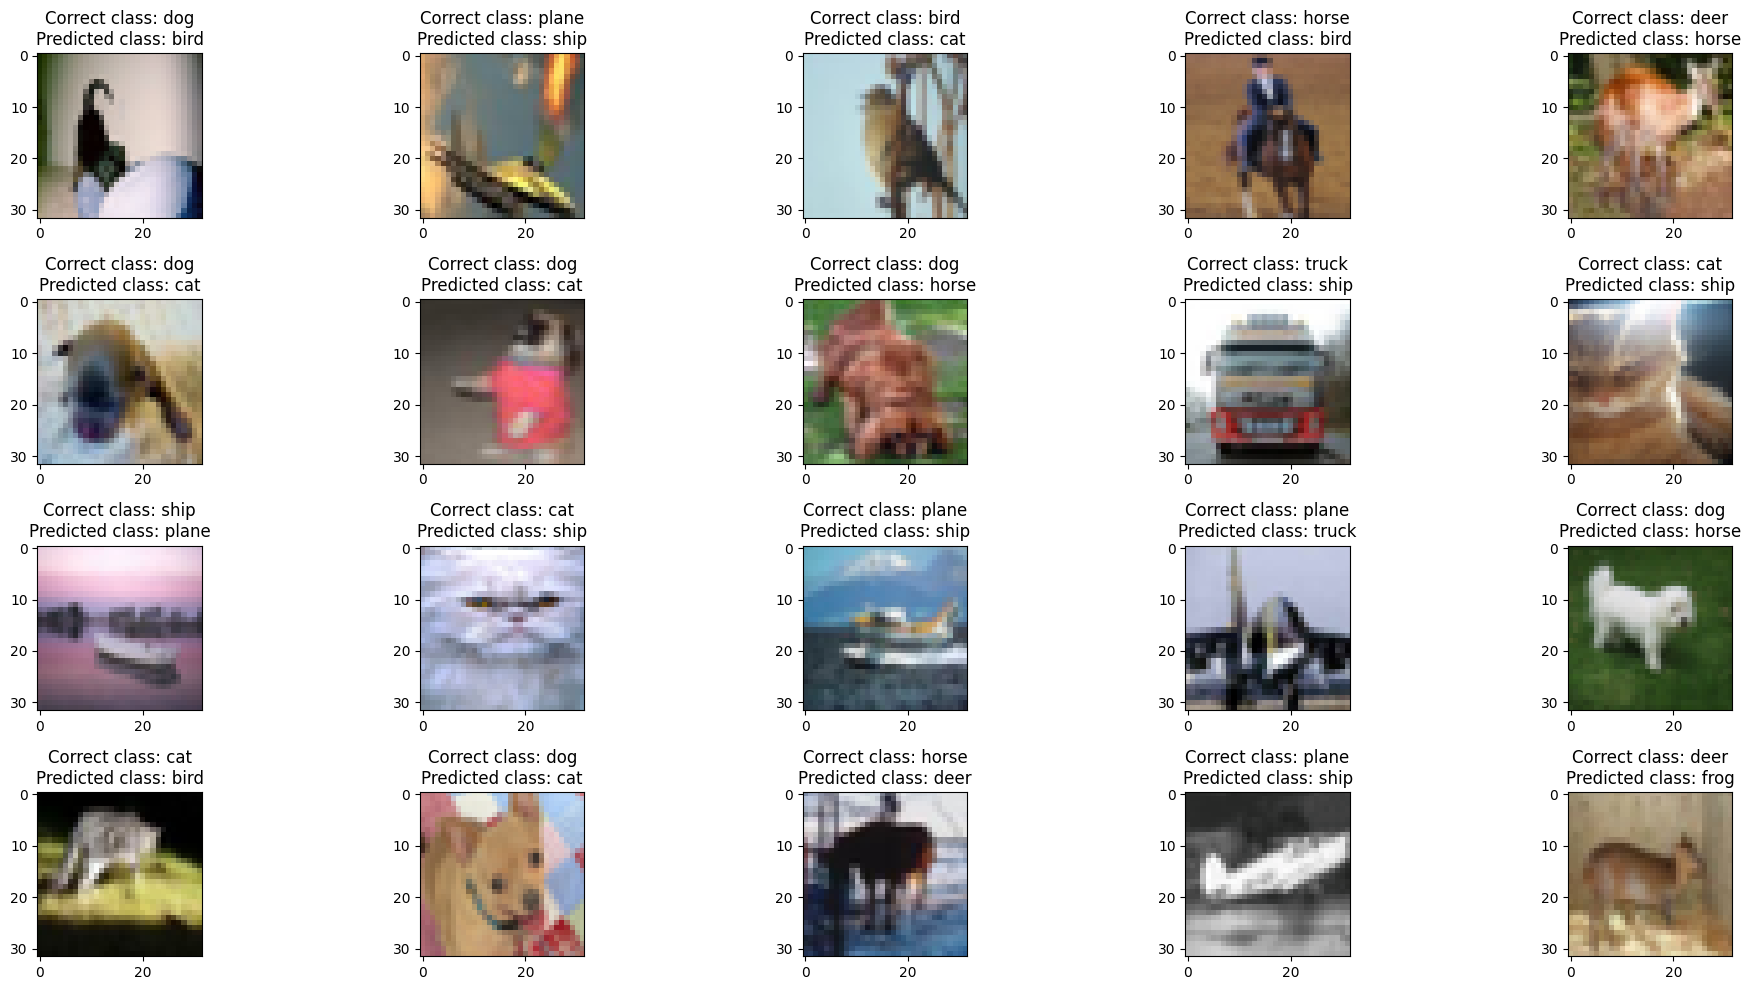

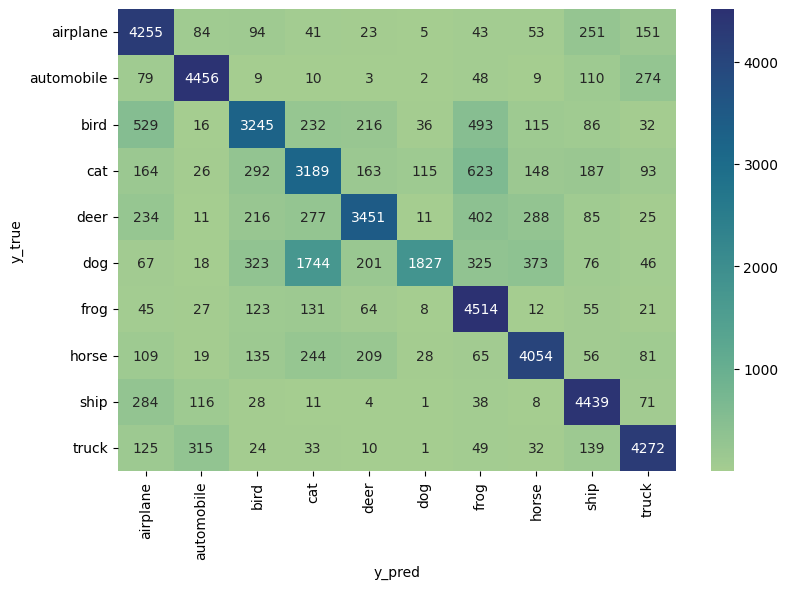

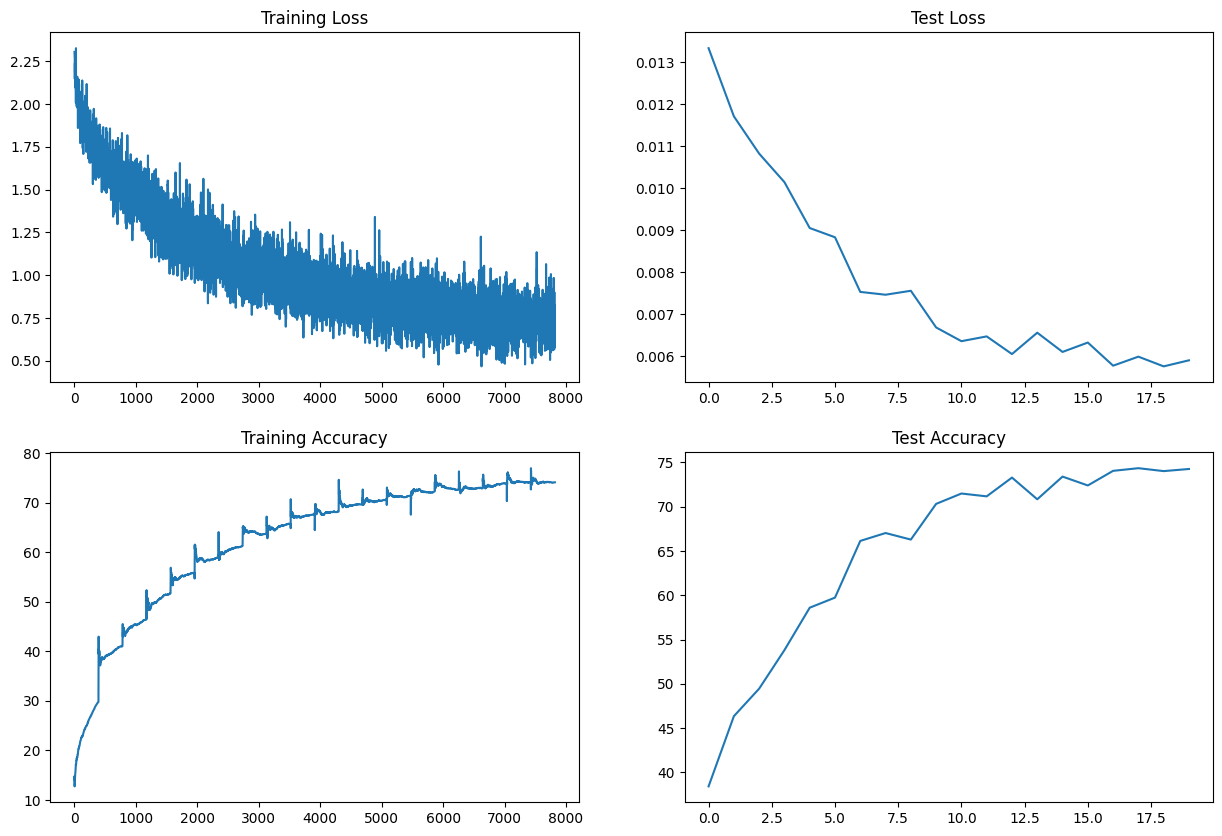

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,mode='min',factor=0.1,patience=5)
criterion = nn.NLLLoss()


trainer = Trainer(model, train_loader, optimizer, criterion, device)
tester = Tester(model, test_loader, criterion, device)

for epoch in range(1, 21):
    trainer.train(epoch=epoch)
    _,test_loss = tester.test()
    scheduler.step(test_loss)
    print('-'*200)


misclassified_images, predictions, labels = tester.get_misclassified_images()

show_misclassified_images(
    misclassified_images[:20],
    predictions[:20],
    labels[:20],
    cifar10.classes,
);

plot_confusion_matrix(model,train_loader,'cuda',train_loader.dataset.classes);

plot_curves(trainer.train_losses,trainer.train_accuracies,tester.test_losses,tester.test_accuracies);

In [9]:
torch.save(model.state_dict(),'./data/GN/modelBN.pth')

In [10]:
torch.save(optimizer.state_dict(),'./data/GN/optimBN.pth')